<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/USMinimumWage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Minimum Wage by Sate from 1968 to 2020

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/Minimum Wage Data.csv', encoding = 'latin')
df.to_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/MinWage.csv', encoding ='utf-8')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/MinWage.csv', encoding = 'latin')
df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


##Groupby to get data of the states

In [4]:
gb = df.groupby('State')
gb.get_group('Alabama').set_index('Year').head()

,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,
1968,0,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1969,54,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
1970,108,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
1971,162,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
1972,216,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [5]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby('State'):
  if act_min_wage.empty:
    act_min_wage = group.set_index('Year')[['State.Minimum.Wage.2020.Dollars']].rename(columns = {'State.Minimum.Wage.2020.Dollars': name})
  else:
    act_min_wage = act_min_wage.join(group.set_index('Year')[['State.Minimum.Wage.2020.Dollars']].rename(columns = {'State.Minimum.Wage.2020.Dollars': name}))

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,0.0,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,0.0,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,0.0,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,0.0,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,0.0,7.43,9.90,0.0,9.90,7.43,8.97,9.28


In [6]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,5.531509,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,3.281419,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,0.000000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,4.630000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000
50%,0.0,9.260000,0.000000,7.210000,9.010000,6.670000,9.430000,8.170000,8.840000,0.000000,...,0.0,6.360000,6.040000,7.220000,9.240000,7.210000,9.700000,7.370000,7.810000,5.550000
75%,0.0,10.510000,8.290000,7.740000,9.710000,8.430000,9.870000,8.620000,9.600000,8.210000,...,0.0,7.350000,7.910000,7.660000,9.820000,7.810000,10.180000,7.930000,8.340000,6.820000
max,0.0,15.610000,12.140000,10.000000,13.000000,12.140000,11.450000,9.900000,14.160000,8.790000,...,0.0,8.660000,10.620000,8.600000,11.090000,9.090000,13.660000,9.430000,9.980000,9.280000


In [7]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.037101,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,-0.193062,...,NaN,-0.507366,-0.609398,-0.017546,0.615675,-0.593675,0.378141,0.056924,0.683108,0.726771
Arizona,NaN,0.037101,1.000000,0.271834,0.639006,0.820730,0.555455,0.477781,0.723523,0.907295,...,NaN,0.398732,-0.115225,0.413915,0.624314,0.096048,0.691863,0.663311,0.014723,0.288171
Arkansas,NaN,-0.332127,0.271834,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.340509,...,NaN,0.520381,0.332492,0.208586,0.236875,0.572595,0.130825,0.504703,-0.069024,-0.235369
California,NaN,0.622245,0.639006,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.443946,...,NaN,-0.109316,-0.236033,0.367924,0.894617,-0.216247,0.816087,0.492809,0.382444,0.598739


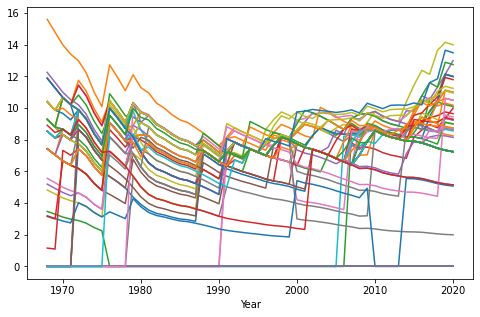

In [8]:
act_min_wage.plot(figsize = (8,5), legend=False)

##Replace 0 with np.NaN

In [9]:
import numpy as np

act_min_wage = act_min_wage.replace(0, np.NaN).dropna(axis = 1) #Usuwanie kolumn (axis=1)
act_min_wage.head() 

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.61,1.16,12.26,7.43,10.41,9.29,9.29,9.29,9.29,8.55,...,9.29,8.55,10.41,3.16,7.43,10.41,11.89,7.43,9.29,8.92
1969,14.80,1.10,11.63,7.05,9.87,8.81,8.81,8.81,8.81,8.11,...,8.81,8.11,9.87,3.00,7.05,9.87,11.28,7.05,8.81,8.46
1970,14.00,7.33,11.00,6.67,10.67,8.33,10.67,10.67,10.67,8.33,...,8.33,8.67,10.67,6.67,6.67,10.67,10.67,6.67,8.67,8.67
1971,13.41,7.03,10.54,6.39,10.22,7.98,10.22,10.22,10.22,7.98,...,7.98,8.30,10.22,6.39,6.39,10.22,10.22,6.39,8.30,8.30
1972,12.99,7.43,10.21,6.19,11.45,9.90,9.90,11.76,9.90,8.66,...,7.74,9.90,9.90,6.19,7.43,9.90,9.90,7.43,8.97,9.28


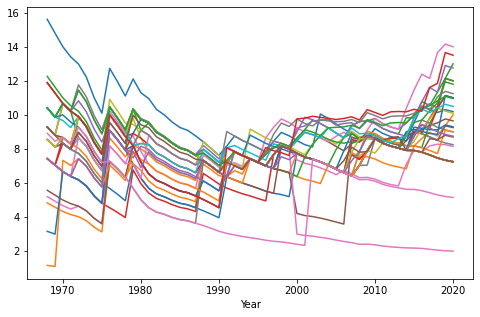

In [10]:
act_min_wage.plot(figsize = (8,5), legend=False)

##Checking if the missing values are occuring throughout all the years

In [11]:
issue_df = df[df['State.Minimum.Wage.2020.Dollars'] == 0]

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis = 1).corr()

for problem in issue_df['State'].unique():
  if problem in min_wage_corr.columns:
    print('Something is missing')

In [12]:
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


In [13]:
grouped_issues = issue_df.groupby('State')

grouped_issues.get_group('Alabama').head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
54,54,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
108,108,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
162,162,1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
216,216,1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [14]:
grouped_issues.get_group('Alabama')['State.Minimum.Wage.2020.Dollars'].sum()

0.0

In [15]:
for state, data in grouped_issues:
  if data['State.Minimum.Wage.2020.Dollars'].sum() != 0.0:
    print('Something is missing')

##Visualizing correlation table

In [16]:
import matplotlib.pyplot as plt

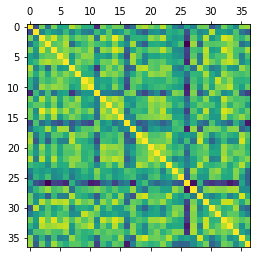

In [17]:
plt.matshow(min_wage_corr)

In [18]:
labels = [state[:2] for state in min_wage_corr.columns] #2 pierwsze znaki nazwy stanu

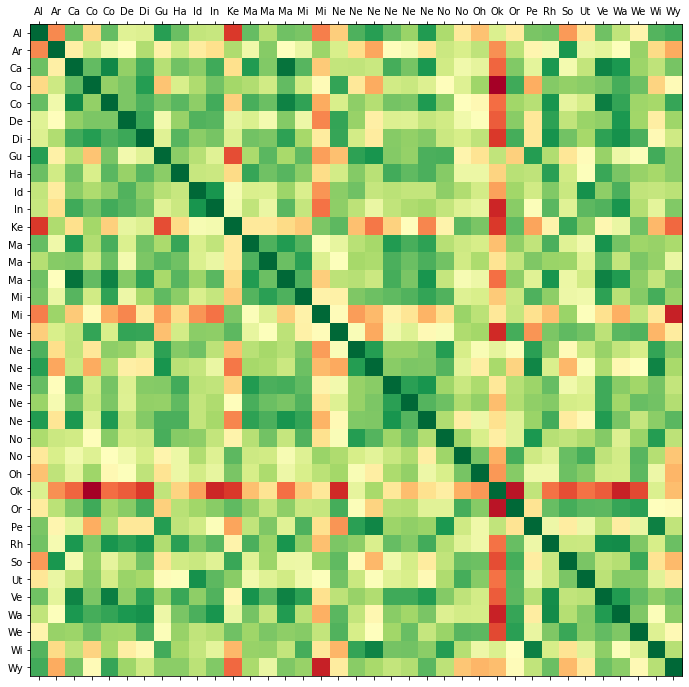

In [19]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111) #
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

##Change of the labels to state postal codes - pd.read_html

In [20]:
!pip install lxml
!pip install html5lib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
import requests

In [22]:
web = requests.get('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')

In [23]:
dfs = pd.read_html(web.text) #Lista data frame'ów z tabel, które zostały odczytane

In [24]:
for df in dfs:
  print(df.head())

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [25]:
state_abbv = dfs[0]
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [26]:
state_abbv.to_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/state_abbv.csv', index = False) #Index = false - nie powstaje nowa kolumna z indeksem

In [27]:
state_abbv = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/state_abbv.csv', index_col = 0)
state_abbv.head()

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


###Converting table to the dictionary

In [28]:
abbv_dict = state_abbv[['Postal Code']].to_dict() #Klucz to wartość indeksu!
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [32]:
labels = [abbv_dict[state] for state in min_wage_corr.columns]

In [33]:
abbv_dict['Guam'] = 'GU' #Dodanie brakującego kodu do słownika (hard coding)

In [34]:
labels = [abbv_dict[state] for state in min_wage_corr.columns]

###Graph with proper abbvs of state names

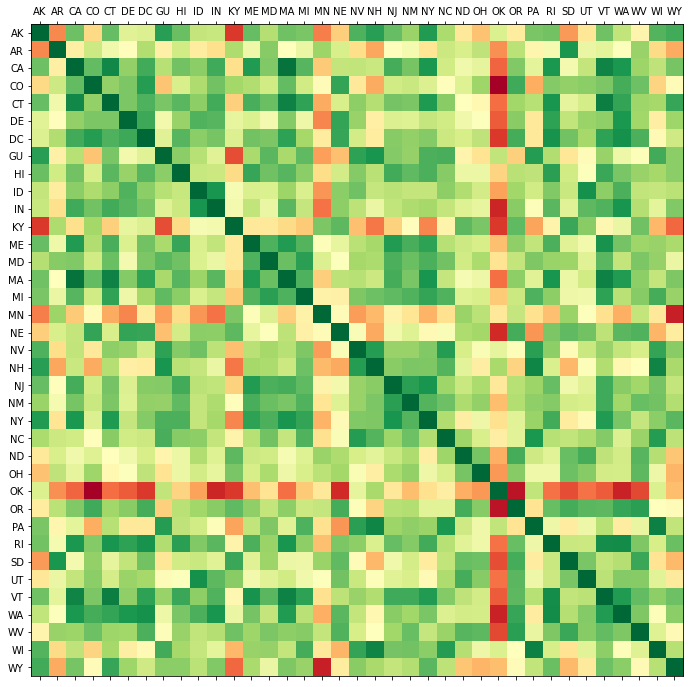

In [35]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111) #
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

##Combining different datasets

###Unemployment rate

In [36]:
unemployment_county = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/Unemployment by county.csv', encoding = 'latin')

In [37]:
unemployment_county.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [38]:
act_min_wage = act_min_wage.replace(0, np.NaN).dropna(axis = 1)
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.61,1.16,12.26,7.43,10.41,9.29,9.29,9.29,9.29,8.55,...,9.29,8.55,10.41,3.16,7.43,10.41,11.89,7.43,9.29,8.92
1969,14.80,1.10,11.63,7.05,9.87,8.81,8.81,8.81,8.81,8.11,...,8.81,8.11,9.87,3.00,7.05,9.87,11.28,7.05,8.81,8.46
1970,14.00,7.33,11.00,6.67,10.67,8.33,10.67,10.67,10.67,8.33,...,8.33,8.67,10.67,6.67,6.67,10.67,10.67,6.67,8.67,8.67
1971,13.41,7.03,10.54,6.39,10.22,7.98,10.22,10.22,10.22,7.98,...,7.98,8.30,10.22,6.39,6.39,10.22,10.22,6.39,8.30,8.30
1972,12.99,7.43,10.21,6.19,11.45,9.90,9.90,11.76,9.90,8.66,...,7.74,9.90,9.90,6.19,7.43,9.90,9.90,7.43,8.97,9.28


In [39]:
def get_min_wage(year, state):
  try:
    return act_min_wage.loc[year][state]
  except:
    return np.NaN

In [40]:
get_min_wage(1970, 'Arkansas')

7.33

In [41]:
%%time
# map(function, iterable which is to be mapped.)
unemployment_county['min_wage'] = list(map(get_min_wage, unemployment_county['Year'], unemployment_county['State']))

CPU times: user 1min 7s, sys: 260 ms, total: 1min 8s
Wall time: 1min 8s


In [42]:
unemployment_county.tail()

,Year,Month,State,County,Rate,min_wage
885543,2009,November,Maine,Somerset County,10.5,8.74
885544,2009,November,Maine,Oxford County,10.5,8.74
885545,2009,November,Maine,Knox County,7.5,8.74
885546,2009,November,Maine,Piscataquis County,11.3,8.74
885547,2009,November,Maine,Aroostook County,9.0,8.74


In [43]:
unemployment_county[['Rate', 'min_wage']].corr() #Brak dużej korelacji

,Rate,min_wage
Rate,1.000000,0.153035
min_wage,0.153035,1.000000


In [44]:
unemployment_county[['Rate', 'min_wage']].cov() #Duża zależność

,Rate,min_wage
Rate,9.687873,0.673099
min_wage,0.673099,2.000364


###Presidential Election Vote

In [45]:
pres16 = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/pres16results.csv', encoding = 'latin')

In [46]:
pres16.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [55]:
#Reducing the size of the dataset to only February 2015
county_2015 = unemployment_county.copy()[(unemployment_county['Year'] == 2015) & (unemployment_county['Month'] == 'February')]
county_2015

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN
...,...,...,...,...,...,...
2797,2015,February,Maine,Somerset County,8.4,8.18
2798,2015,February,Maine,Oxford County,6.8,8.18
2799,2015,February,Maine,Knox County,6.1,8.18
2800,2015,February,Maine,Piscataquis County,7.0,8.18


In [48]:
pres16['st'].unique()

array(['US', 'CA', 'FL', 'TX', 'NY', 'PA', 'IL', 'OH', 'MI', 'NC', 'GA',
       'VA', 'NJ', 'MA', 'WI', 'MN', 'MO', 'WA', 'IN', 'CO', 'TN', 'MD',
       'SC', 'AL', 'AZ', 'LA', 'KY', 'OR', 'CT', 'IA', 'OK', 'MS', 'KS',
       'NV', 'AR', 'UT', 'NE', 'NM', 'ME', 'NH', 'WV', 'ID', 'MT', 'RI',
       'DE', 'HI', 'SD', 'ND', 'VT', 'DC', 'WY', 'AK', nan], dtype=object)

###Replacing state name in County_2015 with the abbreviation

In [49]:
state_abbv = pd.read_csv("/content/drive/MyDrive/Projekty Data Science/US Minimum Wage/state_abbv.csv", index_col=0)
state_abbv.head()

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [50]:
state_abbv_dict = state_abbv.to_dict()['Postal Code']
state_abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [56]:
# county_2015['State'] = county_2015['State'].map(state_abbv_dict) #Wykonać tylko raz!
# county_2015['State'] = county_2015['State'].replace({'State': state_abbv_dict})
# df['col1'].map(di).df['col1'].map(di).fillna(df['col1'])
# df.replace({"col1": di})
county_2015[1000:1010]

,Year,Month,State,County,Rate,min_wage
1000,2015,February,KS,Comanche County,2.9,NaN
1001,2015,February,KS,Graham County,4.2,NaN
1002,2015,February,KS,Atchison County,6.3,NaN
1003,2015,February,KS,Wallace County,2.8,NaN
1004,2015,February,KS,Geary County,6.6,NaN
1005,2015,February,KS,Riley County,3.5,NaN
1006,2015,February,KS,Harvey County,3.9,NaN
1007,2015,February,KS,Phillips County,3.6,NaN
1008,2015,February,KS,Finney County,3.5,NaN
1009,2015,February,KS,Sherman County,3.2,NaN


In [57]:
print(len(county_2015))
print(len(pres16))

2802
18475


In [58]:
pres16.columns

Index(['county', 'fips', 'cand', 'st', 'pct_report', 'votes', 'total_votes',
       'pct', 'lead'],
      dtype='object')

###Merging two datasets

In [59]:
pres16.rename(columns={'county': 'County', 'st':'State'}, inplace = True)
pres16.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [60]:
for df in [county_2015, pres16]:
  df.set_index(['County', 'State'], inplace = True)

In [61]:
pres16.head()

fips             cand  pct_report       votes  total_votes  \
County State                                                              
NaN    US      US     Donald Trump      0.9951  60350241.0  127592176.0   
       US      US  Hillary Clinton      0.9951  60981118.0  127592176.0   
       US      US     Gary Johnson      0.9951   4164589.0  127592176.0   
       US      US       Jill Stein      0.9951   1255968.0  127592176.0   
       US      US    Evan McMullin      0.9951    451636.0  127592176.0   

                   pct          lead  
County State                          
NaN    US     0.472993  Donald Trump  
       US     0.477938  Donald Trump  
       US     0.032640  Donald Trump  
       US     0.009844  Donald Trump  
       US     0.003540  Donald Trump

In [62]:
pres16 = pres16[pres16['cand'] == 'Donald Trump'] #Wybranie wyłącznie procenta głosów na D. Trumpa
pres16 = pres16[['pct']]
pres16.dropna(inplace =True)
pres16.head()

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830
       NY     0.374752

In [63]:
all_together = county_2015.merge(pres16, on = ['County', 'State'])
all_together.dropna(inplace = True)
all_together.head()

,,Year,Month,Rate,min_wage,pct
County,State,,,,,
Major County,OK,2015,February,2.6,2.18,0.864960
Pottawatomie County,OK,2015,February,4.5,2.18,0.701342
Johnston County,OK,2015,February,6.5,2.18,0.770057
Jefferson County,OK,2015,February,5.0,2.18,0.812367
Beaver County,OK,2015,February,2.8,2.18,0.888243


In [67]:
# all_together.drop('Year', axis = 1, inplace = True)
# all_together.drop('Month', axis = 1, inplace = True)
all_together.head()

,,Rate,min_wage,pct
County,State,,,
Major County,OK,2.6,2.18,0.864960
Pottawatomie County,OK,4.5,2.18,0.701342
Johnston County,OK,6.5,2.18,0.770057
Jefferson County,OK,5.0,2.18,0.812367
Beaver County,OK,2.8,2.18,0.888243


##Basic statistics

In [69]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186404,-0.085985
min_wage,0.186404,1.000000,-0.324942
pct,-0.085985,-0.324942,1.000000


In [70]:
all_together.cov()

,Rate,min_wage,pct
Rate,5.743199,0.705474,-0.031771
min_wage,0.705474,2.494004,-0.079120
pct,-0.031771,-0.079120,0.023772
